In [142]:
%pip install altair pandas plotly pygal cairosvg  

     |████████████████████████████████| 904 kB 851 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [16]:
%ls

callgraph.json          example_omp1_papi.csv  README.md    Untitled.ipynb
example_omp18_papi.csv  example_profile.csv    RESEARCH.md


In [161]:
# Pygal
# Sexy python charting -> love to the marketing team

import pandas as pd
import altair as alt
import plotly.express as px
import pygal
import numpy as np
from IPython.display import SVG,display


data = pd.read_csv("example_omp18_papi.csv")
data1 = pd.read_csv("example_omp1_papi.csv")
data.head()
data1.head()
# remember the file function and scope atrebuites

,id,%Time,WallTime,#Hits,IPC,Cycles/s,Instr/s,Flops/s,TOT_CYC,TOT_INS,...,L1_ICM,VEC_DP,DP_OPS,VEC_SP,SP_OPS,TLB_DM,TLB_IM,Function,Scope,File
0,1,14.2,59.850,1197,1.86,2003,3719.0,3556.0,118000.0,218000.0,...,39.275,61633.0,148000.0,10.986,10.986,269.0,1.229,rrtm_taumol3,USER,rrtm_taumol3.F90
1,2,13.5,56.800,1136,1.74,2003,3483.0,3746.0,112000.0,194000.0,...,31.245,59403.0,150000.0,9.023,9.023,261.0,1.045,solver_mcica_lw,USER,radiation_mcica_lw.F90
2,3,11.7,49.487,990,1.79,2003,3577.0,3340.0,99109.0,173000.0,...,28.563,47092.0,116000.0,7.872,7.872,278.0,1.018,save_fluxes,USER,radiation_save.F90
3,4,6.4,27.150,543,1.78,2003,3570.0,3498.0,54374.0,96925.0,...,15.555,26883.0,68079.0,3.968,3.968,189.0,0.556,rrtm_kgb7,USER,rrtm_kgb7.F90
4,5,6.2,26.100,522,1.77,2003,3555.0,3886.0,52271.0,92767.0,...,14.798,26886.0,74526.0,5.032,5.032,171.0,0.524,solver_homogeneous_lw,USER,radiation_homogeneous_lw.F90


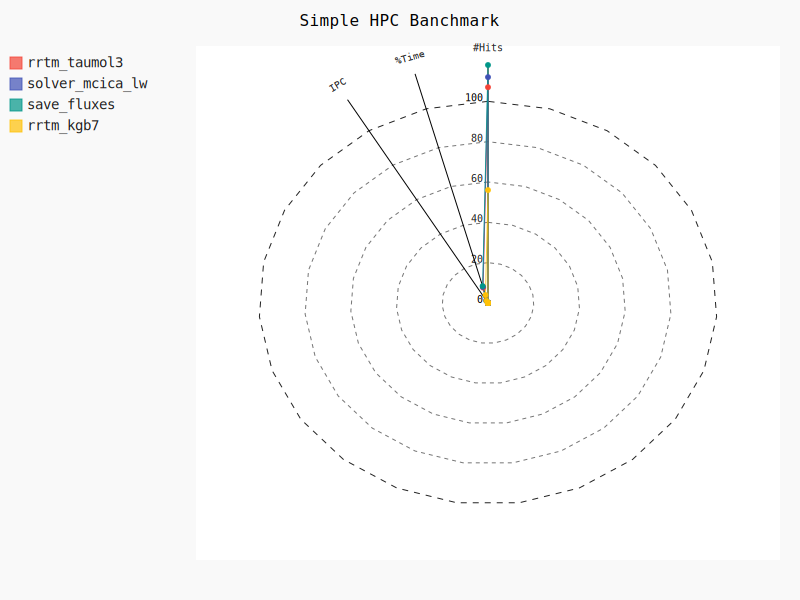

In [162]:
#  Runtime vs. Cache-miss ratios vs. IPC
data_labels = ['rrtm_taumol3', 'solver_mcica_lw', 'save_fluxes', 'rrtm_kgb7', '']
df = data.loc[data['Function'] == 'rrtm_taumol3']
xx = data[['Function','#Hits', '%Time', 'IPC']]
x = df[['#Hits', '%Time', 'IPC']]
dictionary = x.to_dict('r')[0]
keys = list(dictionary.keys())
vals = list(dictionary.values())

df = pd.DataFrame(dict(r= vals, theta = keys))

fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.show()



radar_chart = pygal.Radar()
radar_chart.title = 'Simple HPC Banchmark'
radar_chart.x_labels = ['#Hits', '%Time', 'IPC']
for x in data_labels:
    data_inside = data.loc[data['Function'] == x].to_dict('r')
    if data_inside == []:
        continue
    radar_chart.add(x, data.loc[data['Function'] == x].to_dict('r')[0])
display(SVG(radar_chart.render()))



df = px.data.gapminder()
fig = px.scatter_3d(xx, x='#Hits', y='Function', z='%Time', size='IPC', color="#Hits",
                    hover_data=['Function'])
fig.update_layout(scene_zaxis_type="log")
fig.show()